# Setup
## Imports

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import scipy

from generative_social_choice.utils.helper_functions import get_base_dir_path
from generative_social_choice.slates.voting_utils import gini
from generative_social_choice.ratings.utility_matrix import extract_voter_utilities_from_info_csv
from generative_social_choice.utils.postprocessing import (
    plot_sorted_utility_distributions,
    plot_likert_category_clustered_bar_chart,
    scalar_utility_metrics,
    plot_candidate_distribution_stacked,
    
)


# Embedding Ablation

## Single-Run Plots

In [3]:
# bjr_with_baseline_embeddings_paths = get_results_paths(labelling_model=LABELLING_MODEL, embedding_type="seed_statement", baseline=False)

bjr_with_baseline_embeddings_path =  get_base_dir_path() / "data/demo_data/2025-05-29-232314__generate_slate_via_fish_nn" / "info.csv"
bjr_with_baseline_embeddings = extract_voter_utilities_from_info_csv(bjr_with_baseline_embeddings_path)
bjr_with_baseline_embeddings.head()

,candidate_id,utility
Voter,,
generation1,18,3.652164
generation10,3,3.996646
generation100,17,3.871335
generation11,9,3.996955
generation12,18,3.389729


In [4]:
bjr_with_openai_embeddings_path =  get_base_dir_path() / "data/demo_data/2025-05-29-235156__generate_slate_via_openai_embeddings_nn" / "info.csv"
df_bjr_with_openai_embeddings = extract_voter_utilities_from_info_csv(bjr_with_openai_embeddings_path)
df_bjr_with_openai_embeddings.head()

,candidate_id,utility
Voter,,
generation1,13,3.898625
generation10,13,3.990606
generation100,13,3.872195
generation11,6,3.996033
generation12,21,3.950161


In [5]:
embedding_ablation_utilities = pd.concat([
    bjr_with_baseline_embeddings.utility.rename("Baseline Embeddings"),
    df_bjr_with_openai_embeddings.utility.rename("OpenAI Embeddings")
],
axis=1)
embedding_ablation_utilities

,Baseline Embeddings,OpenAI Embeddings
Voter,,
generation1,3.652164,3.898625
generation10,3.996646,3.990606
generation100,3.871335,3.872195
generation11,3.996955,3.996033
generation12,3.389729,3.950161
...,...,...
generation95,2.217852,3.940947
generation96,3.989112,3.995287
generation97,3.526558,3.087988


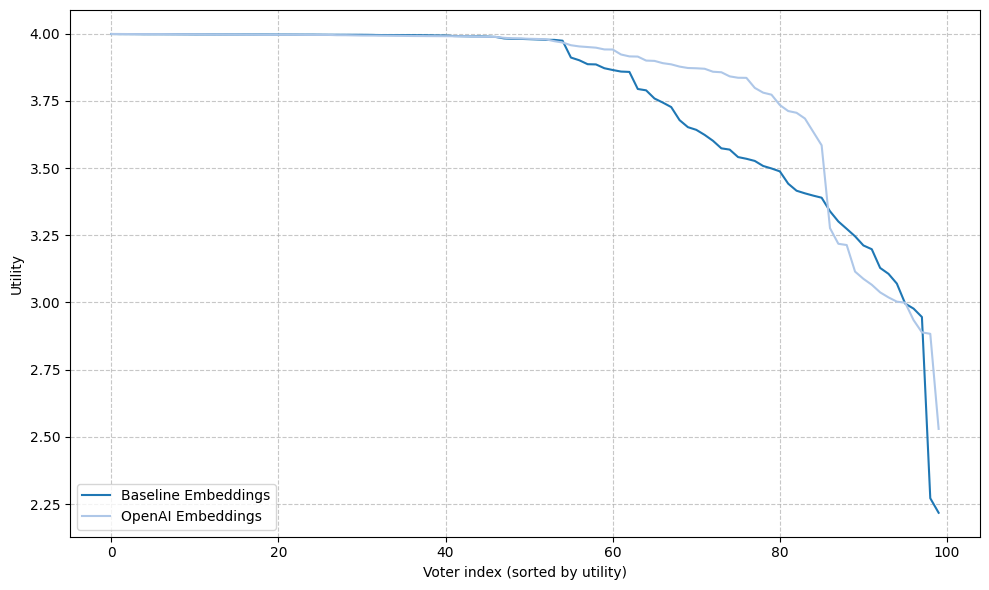

In [6]:
from generative_social_choice.utils.postprocessing import plot_sorted_utility_distributions

embedding_ablation_fig = plot_sorted_utility_distributions(embedding_ablation_utilities)

In [7]:
scalar_utility_metrics(embedding_ablation_utilities)

,Avg_Utility,Min_Utility,25th_Pctile_Utility,Gini
Baseline Embeddings,3.752362,2.217852,3.561705,0.046244
OpenAI Embeddings,3.809875,2.529911,3.839772,0.037781


## Multi-run

In [8]:
baseline_embedding_run_dirs = (get_base_dir_path() / "data/demo_data").glob("*via_fish_nn*")
baseline_files = [d / "info.csv" for d in baseline_embedding_run_dirs]

baseline_utilities = pd.concat([
    extract_voter_utilities_from_info_csv(p).utility.rename(i)
    for i, p in enumerate(baseline_files)
], axis=1)
baseline_utilities.columns = pd.MultiIndex.from_product([
    ["Baseline Embedding"], 
    baseline_utilities.columns
])

baseline_utilities.head()

Baseline Embedding                    
                               0         1         2
Voter                                               
generation1             3.652164  3.930224  3.419756
generation10            3.996646  3.968564  3.995768
generation100           3.871335  3.602703  3.935093
generation11            3.996955  3.992691  3.996189
generation12            3.389729  3.721042  3.505447

In [10]:
openai_embedding_run_dirs = (get_base_dir_path() / "data/demo_data").glob("*via_openai_embeddings*")
openai_embedding_files = [d / "info.csv" for d in openai_embedding_run_dirs]

openai_embedding_utilities = pd.concat([
    extract_voter_utilities_from_info_csv(p).utility.rename(i)
    for i, p in enumerate(openai_embedding_files)
], axis=1)
openai_embedding_utilities.columns = pd.MultiIndex.from_product([
    ["OpenAI Embedding"], 
    openai_embedding_utilities.columns
])

openai_embedding_utilities.head()

OpenAI Embedding                    
                             0         1         2
Voter                                             
generation1           3.898625  3.889442  3.849859
generation10          3.990606  3.994331  3.988506
generation100         3.872195  3.894820  3.969437
generation11          3.996033  3.993444  3.995450
generation12          3.950161  3.927704  3.845123

In [11]:
all_multirun_utilities = pd.concat([
    baseline_utilities,
    openai_embedding_utilities
], axis=1)

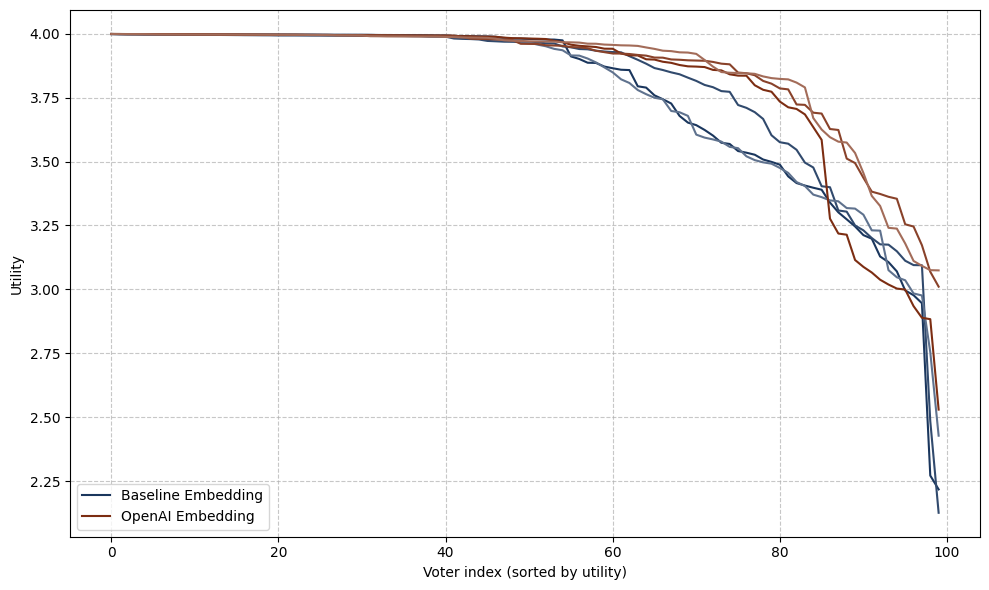

In [12]:
from generative_social_choice.utils.postprocessing import plot_sorted_utility_distributions

embedding_ablation_multi_fig = plot_sorted_utility_distributions(all_multirun_utilities.dropna(axis=1, how="any"))

In [13]:
scalar_utility_metrics(all_multirun_utilities)

Avg_Utility  Min_Utility  25th_Pctile_Utility      Gini
Baseline Embedding 0     3.752362     2.217852             3.561705  0.046244
                   1     3.793090     2.126395             3.759668  0.039516
                   2     3.757577     2.427896             3.556035  0.043713
OpenAI Embedding   0     3.809875     2.529911             3.839772  0.037781
                   1     3.861006     3.010655             3.872018  0.025974
                   2     3.862189     3.074265             3.846868  0.026516